# データの読み込み

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd

In [5]:
# csvデータの読み込み
df = pd.read_csv('housing.csv')

In [7]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布の確認

In [9]:
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


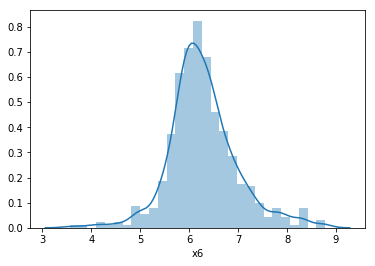

In [10]:
sns.distplot(df['x6'])

# 外れ値除去（3σ法）

In [19]:
col = 'x6'

In [20]:
# 平均
mean = df.mean()

In [21]:
mean[col]

6.284634387351788

In [22]:
# 標準偏差
sigma = df.std()

In [23]:
sigma[col]

0.7026171434153234

In [24]:
low = mean[col] - (3 * sigma[col])
low

4.176782957105817

In [25]:
high = mean[col] + (3 * sigma[col])
high

8.392485817597759

In [33]:
# 3σ内に収まっているデータのみ抽出する
df2 = df[
    (df[col] > low) & (df[col] < high)
]

In [30]:
df2.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [31]:
len(df)

506

In [32]:
len(df2)

498

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


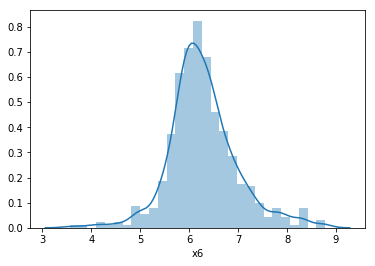

In [34]:
# データ確認
sns.distplot(df['x6'])

In [38]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [40]:
_df = df
for col in cols:
    # 3σ法の上下限値を設定
    low  = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    # 条件での絞り込み
    _df = _df[
        (_df[col] > low) & (_df[col] < high)
    ]

In [41]:
# オリジナル
len(df)

506

In [42]:
# 3σ法適応後
len(_df)

415

対処法

- 外れ値は取り除く
- 外れ値を平均もしくは中央値などで埋める
- 主成分分析などを使って、潜在変数に変換した後に3σ法を適応　←　高度


# 入力変数と出力変数に分解

In [43]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [44]:
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

# 訓練データと検証データに分割

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 重回帰分析

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
# モデルを宣言
model = LinearRegression()

In [49]:
# モデルの学習
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
# 検証　←　訓練データ
model.score(X_train, y_train)

0.7972109224535134

In [51]:
# 検証 ← 検証データ
model.score(X_test, y_test)

0.6253776004329585

In [52]:
# 過学習（オーバーフィッテイング）

# スケーリング

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
# scalerの宣言
scaler = StandardScaler()

In [55]:
# scalerの学習　←　平均と標準偏差を計算
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2  = scaler.transform(X_test)

In [61]:
# モデルの宣言
model = LinearRegression()

In [62]:
# モデルの学習
model.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
# 検証　←　訓練データ
model.score(X_train2, y_train)

0.7972109224535133

In [66]:
# 検証　← 検証データ
model.score(X_test2, y_test)

0.6253776004329594

In [73]:
# 重みの確認
np.set_printoptions(precision=2, suppress=True)
model.coef_

array([-0.2 ,  0.21,  0.51,  0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


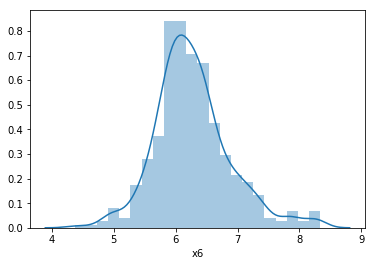

In [74]:
sns.distplot(_df['x6'])